In [ ]:
import mdfda as mdf
# import visual tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns
import numpy as np
from numpy import cumsum, polyfit, polyval, mean, sqrt, arange, zeros, nan, log2
from numpy.lib.stride_tricks import as_strided as ast
import matplotlib.pyplot as plt

plt.style.use('seaborn-talk')
plt.style.use('bmh')

#plt.rcParams['font.family'] = 'DejaVu Sans Mono'
#plt.rcParams['font.size'] = 9.5
plt.rcParams['font.weight'] = 'medium'
#plt.rcParams['figure.figsize'] = 10,7
blue, green, red, purple, gold, teal = sns.color_palette('colorblind', 6)

# import util libs

from tqdm import tqdm, tqdm_notebook
import warnings
warnings.filterwarnings("ignore")

RANDOM_STATE = 777
####

import pandas as pd
import numpy as np
import pickle
import os
from sklearn.metrics.pairwise import rbf_kernel
import pandas as pd
import numpy as np

import time
from sklearn.metrics import accuracy_score, roc_auc_score
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sb
###
import pystan
from scipy.stats import pearsonr, zscore
from MFDFA import fgn
# Plot settings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sb.set()

from numpy import cumsum
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm



# import visual tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-talk')
plt.style.use('bmh')

#plt.rcParams['font.family'] = 'DejaVu Sans Mono'
#plt.rcParams['font.size'] = 9.5
plt.rcParams['font.weight'] = 'medium'
#plt.rcParams['figure.figsize'] = 10,7
blue, green, red, purple, gold, teal = sns.color_palette('colorblind', 6)

# import util libs

from tqdm import tqdm, tqdm_notebook
import warnings
warnings.filterwarnings("ignore")

RANDOM_STATE = 777

# %matplotlib inline

In [ ]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
def tick_bars(df, price_column, m):
    '''
    compute tick bars

    # args
        df: pd.DataFrame()
        column: name for price data
        m: int(), threshold value for ticks
    # returns
        idx: list of indices
    '''
    t = df[price_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += 1
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def tick_bar_df(df, price_column, m):
    idx = tick_bars(df, price_column, m)
    return df.iloc[idx].drop_duplicates()

def tick_bars(df, price_column, m):
    '''
    compute tick bars

    # args
        df: pd.DataFrame()
        column: name for price data
        m: int(), threshold value for ticks
    # returns
        idx: list of indices
    '''
    t = df[price_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += 1
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def tick_bar_df(df, price_column, m):
    idx = tick_bars(df, price_column, m)
    return df.iloc[idx].drop_duplicates()
def tick_bars(df, price_column, m):
    '''
    compute tick bars

    # args
        df: pd.DataFrame()
        column: name for price data
        m: int(), threshold value for ticks
    # returns
        idx: list of indices
    '''
    t = df[price_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += 1
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def tick_bar_df(df, price_column, m):
    idx = tick_bars(df, price_column, m)
    return df.iloc[idx].drop_duplicates()

def mad_outlier(y, thresh=5.):
    '''
    compute outliers based on mad
    # args
        y: assumed to be array with shape (N,1)
        thresh: float()
    # returns
        array index of outliers
    '''
    median = np.median(y)
    diff = np.sum((y - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [ ]:
os.getcwd()
''' Locations'''
cwd= os.getcwd()
extHD = '/media/ak/My Passport/'
extHdData = "".join((extHD, 'Data'))
extHdExpData = "".join((extHD, 'Experiment Data')) #['features', 'labels', 'metrics', 'models']
extHdFutures = "".join((extHD, 'Barket Data/raw bloomberg data')) #futures
futuresSymbols  = []
os.listdir(extHdExpData)
cleanLOBFolder = "/".join((extHdExpData,'CleanLOBData'))
symbols =sorted(os.listdir(cleanLOBFolder))

symbolIdx = 0
symbolCleanSymbolFolder = "/".join((cleanLOBFolder, symbols[symbolIdx]))
symbolCleanFilesList = os.listdir(symbolCleanSymbolFolder)

In [ ]:

FileName ="/".join((bmrg_folders[symbolIDi], str('fileID_'+fileIDi+'_FileDictClocks.csv')))

save_loc = os.path.join(extHdFutures, FileName)

In [ ]:
dfTest =pd.read_csv("/".join((symbolCleanSymbolFolder,symbolCleanFilesList[0])))
dfTestCopy = dfTest.copy(deep=True)

In [ ]:
dfGrouped = dfTestCopy.groupby('TradeTime')['BidSize', 'AskSize', 'TradeSize']
dfGroupedSum = dfGrouped.sum()
dfGroupedSum.reset_index(level=0, inplace=True)

In [ ]:
dfGroupedSum.head()

In [ ]:
dfMergedtEST =dfGroupedSum.merge(dfTestCopy, on='TradeTime')

In [ ]:
dfMergedLOB = dfMergedtEST.drop(columns=['Unnamed: 0','type_x','type_y','AskQuoteId','BidQuoteId'])

In [ ]:
dfMergedLOB.head(3).columns.values

In [ ]:
dfMergedLOB = dfMergedLOB.rename(columns={"TradeSize_x":"TradedSize", })


In [ ]:
mad = mad_outlier(dfMergedLOB.MicroPrice.values.reshape(-1,1))

In [ ]:
_=sns.boxplot(dfMergedLOB.loc[~mad].MicroPrice)

In [ ]:
dfLOB =dfMergedLOB.loc[~mad]

In [ ]:
dfLOB['TradedDollarVolume'] =dfLOB.TradedSize*dfLOB.TradePrice

In [ ]:
dfMergedLOB.columns.values

## Tick Bars ##

In [ ]:
n_ticks = dfLOB.shape[0]
volume_ratio = (dfLOB.TradedSize.sum()/n_ticks).round()
dollar_ratio = (dfLOB.TradedDollarVolume.sum()/n_ticks).round()
print(f'num ticks: {n_ticks:,}')
print(f'volume ratio: {volume_ratio}')
print(f'dollar ratio: {dollar_ratio}')

In [ ]:
tick_M = 5 # arbitrary
print(f'tick threshold: {tick_M:,}')
tidx = tick_bars(dfLOB, 'TradePrice', tick_M)
tidx[:10]

In [ ]:
tick_df = tick_bar_df(dfLOB, 'TradePrice', tick_M)
tick_df.shape

In [ ]:
# The time array of the trajectory
t_final= tick_df.shape[0]
delta_t=1 #tick
time = np.arange(0, t_final, delta_t)
y = np.asarray(tick_df.MicroPricePctChange)

In [ ]:
#This is the stochastic trajectory over time
plt.plot(y, label = r'Trajectory of MicroPrice Pct Change(tick clock)')

plt.xlabel(r'time $t$')
plt.ylabel(r'$y(t)$')
plt.legend()

In [ ]:
from MFDFA import fgn
from MFDFA import MFDFA

In [ ]:

# Select a band of lags, which usually ranges from 
# very small segments of data, to very long ones, as
lag = np.logspace(0.7, 4, 60).astype(int)
# Notice these must be ints, since these will segment
# the data into chucks of lag size

# Select the power q
q = 9

# The order of the polynomial fitting
order = 2

# Obtain the (MF)DFA as
lag, dfa = MFDFA(y, lag = lag, q = q, order = order)

In [ ]:
plt.plot(lag, dfa)
# To uncover the Hurst index, lets get some log-log plots
plt.loglog(lag, dfa, 'o', label='fOU: MFDFA q=2')

# And now we need to fit the line to find the slope. We will
# fit the first points, since the results are more accurate 
# there. Don't forget that if you are seeing in log-log
# scales, you need to fit the logs of the results
np.polyfit(np.log(lag[:15]), np.log(dfa[:15]),1)[0]
plt.show()
# Now what you should obtain is: slope = H + 1

In [ ]:
def plot_trends(X,scale,m=1,label='',title=''):
    t = np.arange(X.shape[0])
   
    plt.plot(t,X,lw=2.0)
    for i0 in range(0,X.shape[0]-scale+1,scale):
        i1 = i0+scale
        t0 = t[i0:i1]
        C = np.polyfit(t0,X[i0:i1],m)
        fit = np.polyval(C,t0);
        RMS = np.sqrt(((X[i0:i1]-fit)**2).mean())
        plt.plot(t0,fit,color='r',linestyle='--')
        plt.plot(t0,fit-RMS,'r')
        plt.plot(t0,fit+RMS,'r')
#         plt.tight_layout( h_pad=2.4)
#        
        plt.ylabel(label,ha='center')
#     if title: plt.text(100,500,title,fontsize=12) 

scale = 1000
RW1 = np.cumsum(y-y.mean())

plt.subplot(311)
plt.title('A Linear detrending', fontsize= 9 )
plot_trends(RW1,scale,1,label='Multifractal signal\namplitude',
            title='A Linear detrending')
plt.legend(['Noise like time-series','Local trend','+/- 1 local RMS'], prop={'size': 6}, loc='upper right')
plt.subplot(312)
plt.title('B Quadratic detrending', fontsize= 9 )
plot_trends(RW1,scale,2,label='MicroPrice Change\namplitude',
            title='B Quadratic detrending')
plt.subplot(313)
plt.title('C Cubig detrending')
plot_trends(RW1,scale,3,label='MicroPrice Change\namplitude',
            title='C Cubic detrending')


In [ ]:
import time

scstep = 8
scales = np.floor(2.0**arange(4,10.1,1.0/scstep)).astype('i4')
RW = mdf.rwalk(y.ravel())
t0 = time.clock()
RMS0 = mdf.compRMS(RW,scales,1)
dtslow = time.clock() - t0
print ('Took %0.3fs'%dtslow)

In [ ]:
# scstep = 8
# scales = np.floor(2.0**arange(4,10.1,1.0/scstep)).astype('i4')
# RW = mdf.rwalk(y.ravel())
# t0 = time.clock()
# RMS = fastRMS(RW,scales,1)
# dtfast = time.clock() - t0
# print('Took %0.3fs'%dtfast)

In [ ]:
plt.subplot(211)

t = arange(0,RW.shape[0],scales[0])+scales[0]/2.0
plt.imshow(RMS0,extent=(t[0],t[-1],log2(scales[0]),log2(scales[-1])),aspect='auto')
plt.yticks(log2(scales)[::scstep],scales[::scstep])
plt.text(500,log2(scales[-scstep]),'compRMS (%0.3fs)'%dtslow,ha='left',color='w',fontsize=20)
plt.ylabel('Scale'); plt.colorbar();
plt.subplot(212)
plt.imshow(RMS,extent=(t[0],t[-1],log2(scales[0]),log2(scales[-1])),aspect='auto')
plt.yticks(log2(scales)[::scstep],scales[::scstep])
plt.text(500,log2(scales[-scstep]),'fastRMS (%0.3fs)'%dtfast,ha='left',color='w',fontsize=20)
plt.xlabel('Sample index'); plt.ylabel('Scale'); plt.colorbar();
plt.tight_layout()

## Volume Clock ##

In [ ]:
def volume_bars(df, volume_column, m):
    '''
    compute volume bars

    # args
        df: pd.DataFrame()
        volume_column: name for volume data
        m: int(), threshold value for volume
    # returns
        idx: list of indices
    '''
    t = df[volume_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += x
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def volume_bar_df(df, volume_column, m):
    idx = volume_bars(df, volume_column, m)
    return df.iloc[idx].drop_duplicates()

In [ ]:
volume_M =5 
print(f'volume threshold: {volume_M:,}')
v_bar_df = volume_bar_df(df, 'TradedSize', volume_M)


In [ ]:
y_vc = np.asarray(v_bar_df.MicroPricePctChange.dropna())
#This is the stochastic trajectory over time
plt.plot(y_vc, label = r'Trajectory of MicroPrice Pct Change(vol clock)')

plt.xlabel(r'time $t$')
plt.ylabel(r'$y(t)$')
plt.legend()

In [ ]:
def plot_trends(X,scale,m=1,label='',title=''):
    t = np.arange(X.shape[0])
   
    plt.plot(t,X,lw=2.0)
    for i0 in range(0,X.shape[0]-scale+1,scale):
        i1 = i0+scale
        t0 = t[i0:i1]
        C = np.polyfit(t0,X[i0:i1],m)
        fit = np.polyval(C,t0);
        RMS = np.sqrt(((X[i0:i1]-fit)**2).mean())
        plt.plot(t0,fit,color='r',linestyle='--')
        plt.plot(t0,fit-RMS,'r')
        plt.plot(t0,fit+RMS,'r')
#         plt.tight_layout( h_pad=2.4)
#        
        plt.ylabel(label,ha='center')
#     if title: plt.text(100,500,title,fontsize=12) 

scale = 1000
RW1 = np.cumsum(y_vc-y_vc.mean())
plt.title('Volume Clock')
plt.subplot(311)
plt.title('A Linear detrending', fontsize= 9 )
plot_trends(RW1,scale,1,label='Multifractal signal\namplitude',
            title='A Linear detrending')
plt.legend(['Noise like time-series','Local trend','+/- 1 local RMS'], prop={'size': 6}, loc='upper right')
plt.subplot(312)
plt.title('B Quadratic detrending', fontsize= 9 )
plot_trends(RW1,scale,2,label='MicroPrice Change\namplitude',
            title='B Quadratic detrending')
plt.subplot(313)
plt.title('C Cubig detrending')
plot_trends(RW1,scale,3,label='MicroPrice Change\namplitude',
            title='C Cubic detrending')

In [ ]:
import time

scstep = 8
scales = np.floor(2.0**arange(4,10.1,1.0/scstep)).astype('i4')
RW = mdf.rwalk(y.ravel())
t0 = time.clock()
RMS0 = mdf.compRMS(RW,scales,1)
dtslow = time.clock() - t0
print ('Took %0.3fs'%dtslow)

In [ ]:
# scstep = 2
# scales = np.floor(2.0**arange(4,10.1,1.0/scstep)).astype('i4')
# RW = mdf.rwalk(y.ravel())
# t0 = time.clock()
# RMS = mdf.fastRMS(RW,scales,1)
# dtfast = time.clock() - t0
# print('Took %0.3fs'%dtfast)

In [ ]:
def fastRMS(X, scales, m=1, verbose=False):
    """Compute RMS of detrended signal in sliding windows.
    RMS is computed for each scale from scales array. RMS is evaluated
    for each scale (N elements) and in all possible windows of N elements.
    RMS in windows which do not fully overlap with signal (edges) are not computed,
    result for them is set to nan.
    The step for sliding of windows is set to scales[0].

    This is a fast vectorized version of compRMS function.

	Parameters
	----------
	X:       array, time-series
    scales:  array, scales (number of elements in a window) for RMS computation
    m:       order of polynomial for polyfit

	Examples
	# --------
    # >>> X = cumsum(0.1*randn(8000))
    # >>> scales = (2**arange(4,10)).astype('i4')
	# >>> RMS = fastRMS(X,scales)
    # >>> subplot(311)
    # >>> plot(arange(0,X.shape[0],scales[0]),RMS.T/scales + 0.01*arange(len(scales)))
    # >>> subplot(312)
    # >>> mRMS = ma.array(RMS,mask=isnan(RMS))
    # >>> loglog(scales,mRMS.mean(1),'o-',ms=5.0,lw=0.5)
    # >>> subplot(313)
    # >>> for q in [-3,-1,1,3]:
    #         loglog(scales,((mRMS**q).mean(1))**(1.0/q),'o-',ms=5.0,lw=0.5)

	"""
    from numpy.polynomial.polynomial import polyval as mpolyval, polyfit as mpolyfit
    step = scales[0]
    out = nan + zeros((len(scales), X.shape[0] // step), 'f8')
    j = 0
    for scale in scales:
        if verbose: 
            i0 = scale // 2 / step + 1
            Y = mdf.rw(X[step - (scale // 2) % step:], scale, step)
            i = arange(scale)
            C = mpolyfit(i, Y.T, m)
            rms = sqrt(((Y - mpolyval(i, C)) ** 2).mean(1))
            out[j, i0:i0 + rms.shape[0]] = rms
        j += 1
    return out

In [ ]:
# X = cumsum(0.1*np.random.randn(8000))
# scales = (2**arange(4,10)).astype('i4')
# RMS = fastRMS(X,scales)
# plt.subplot(311)
# plt.plot(arange(0,X.shape[0],scales[0]),RMS.T/scales + 0.01*arange(len(scales)))
# plt.subplot(312)
# mRMS = np.ma.array(RMS,mask=np.isnan(RMS))
# plt.loglog(scales,mRMS.mean(1),'o-',ms=5.0,lw=0.5)
# plt.subplot(313)
# for q in [-3,-1,1,3]:
#     plt.loglog(scales,((mRMS**q).mean(1))**(1.0/q),'o-',ms=5.0,lw=0.5)

In [ ]:
x1= dfLOB.MicroPricePctChange.values
x2 = v_bar_df.MicroPricePctChange.values
y1 = dfLOB.Duration.diff().values
y2 = v_bar_df.Duration.diff().values

In [ ]:
ticks = np.sign(dfLOB.TradePrice -dfLOB.TradePrice.shift(1) )
vticks = np.sign(v_bar_df.TradePrice -v_bar_df.TradePrice.shift(1) )
ticks_adj = ticks.copy()
vticks_adj = vticks.copy()


In [ ]:
ticks_adj = ticks.replace(to_replace=0, method='ffill')
vticks_adj = vticks.replace(to_replace=0, method='ffill')

In [ ]:
# Calculate autocorrelation for n lags 
size=15
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)
fig, ax1 = plt.subplots(figsize=(8,5))
for i in np.arange( 1, 1000 ):
    ax1.bar( i, ticks_adj.autocorr( lag = i ), color = 'blue' )
ax1.set_title( 'Autocorrelation of tick test data by lag' )
ax1.set_ylabel( 'Autocorrelation' )
ax1.set_xlabel( 'Lag' )
plt.show()

In [ ]:
size=15
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)
# Calculate autocorrelation for n lags 
fig, ax1 = plt.subplots(figsize=(8,5))
for i in np.arange( 1, 1000 ):
    ax1.bar( i, vticks_adj.autocorr( lag = i ), color = 'red' )
ax1.set_title( 'Autocorrelation of  volume tick test data by lag' )
ax1.set_ylabel( 'Autocorrelation' )
ax1.set_xlabel( 'Lag' )
plt.show()

In [ ]:
dfTradeDirection = dfLOB[['TradePrice','BestBid','BestAsk']]


In [ ]:
dfLOB.loc[dfLOB ['TradePrice'] == dfLOB ['BestBid'],'TradeDirection'] =-1 
dfLOB.loc[dfLOB ['TradePrice'] == dfLOB ['BestAsk'],'TradeDirection'] =1

In [ ]:
dfLOB

In [ ]:
trades_adj = dfTradeDirection.TradeDirection.replace(to_replace=0, method='ffill')

In [1]:
size=15
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
# Calculate autocorrelation for n lags 
fig, ax1 = plt.subplots(figsize=(8,5))

autocorrelseries= dict()
for i in np.arange( 1, 1000 ):
    ax1.set_facecolor('xkcd:white')
    ax1.bar( i, trades_adj.autocorr( lag = i ), color = 'darkblue' )
    autocorrelseries[i] = trades_adj.autocorr( lag = i )
ax1.set_title( 'Autocorrelation of Direction of Trades by lag' )
ax1.set_ylabel( 'Autocorrelation' )
ax1.set_xlabel( 'Lag' )
# Initial value of y at t=0, lifetime in s
N, tau = 1,50
# Maximum time to consider (s)
tmax = 1000
# A suitable grid of time points, and the exponential decay itself
t = np.linspace(0, tmax, 10000)
y = N * np.exp(-t/tau)

# fig = plt.figure()
# ax = fig.add_subplot(111)
ax1.plot(t, y, color='r', linestyle ='dotted')
plt.savefig('/home/ak/Documents/Research/Papers/figures/autocorrelsymbol.png', dpi=150) 
plt.show()
# file_location = "".join(('home/ak/Documents/Research/Papers/figures/','autoCorrelLags.png'))

# plt.savefig(file_location, dpi=150)


NameError: name 'plt' is not defined

In [ ]:
autocorrelseries

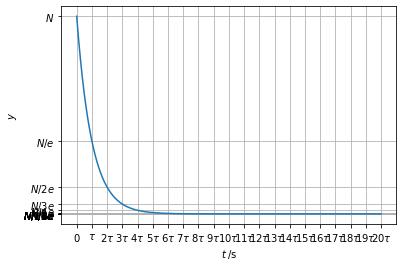

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Initial value of y at t=0, lifetime in s
N, tau = 1, 50
# Maximum time to consider (s)
tmax = 1000
# A suitable grid of time points, and the exponential decay itself
t = np.linspace(0, tmax, 1000)
y = N * np.exp(-t/tau)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, y)

# The number of lifetimes that fall within the plotted time interval
ntau = tmax // tau + 1
# xticks at 0, tau, 2*tau, ..., ntau*tau; yticks at the corresponding y-values
xticks = [i*tau for i in range(ntau)]
yticks = [N * np.exp(-i) for i in range(ntau)]
ax.set_xticks(xticks)
ax.set_yticks(yticks)

# xtick labels: 0, tau, 2tau, ...
xtick_labels = [r'$0$', r'$\tau$'] + [r'${}\tau$'.format(k) for k in range(2,ntau)]
ax.set_xticklabels(xtick_labels)
# corresponding ytick labels: N, N/e, N/2e, ...
ytick_labels = [r'$N$',r'$N/e$'] + [r'$N/{}e$'.format(k) for k in range(2,ntau)]
ax.set_yticklabels(ytick_labels)

ax.set_xlabel(r'$t\;/\mathrm{s}$')
ax.set_ylabel(r'$y$')
ax.grid()
plt.show()

In [ ]:
import stylised_facts.stylised_facts_data_utilities